#EE769 Assignment 2(Part2)

##Vyomkesh Chaudhary
##203070028

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df_train_final = pd.read_csv('train_final.csv')                       ## Reading csv files into data frames
df_test_final = pd.read_csv('test_final.csv')

#Train/test splitting

In [ ]:
X = df_train_final.drop("label",axis=1)
y = df_train_final["label"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

stratify makes a split so that proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

#Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler as ss
scalar = ss()
X_train = scalar.fit_transform(X_train)
X_valid = scalar.transform(X_valid)
X_test = scalar.transform(df_test_final)

#Part 3: Declaration of ML frameworks

https://www.datasciencecentral.com/profiles/blogs/how-to-choose-a-machine-learning-model-some-guidelines

#Support Vector Classifier(SVC)

In [ ]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)

acc_SVC = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_SVC

74.98

In [ ]:
from sklearn.externals import joblib
joblib.dump(svc, 'save_model_svc.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['save_model_svc.pkl']

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='entropy', n_estimators = 1000,min_samples_split=8,random_state=42,verbose=5)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_valid)

acc_rfc = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_rfc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
buildi

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.8s finished


78.9

In [ ]:
joblib.dump(rfc, 'save_model_rfc.pkl')

['save_model_rfc.pkl']

#Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

BC = BaggingClassifier(n_estimators=100)
BC.fit(X_train, y_train)     
y_pred = BC.predict(X_valid)

acc_BC = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_BC

76.87

#XGboost

Compared to random forests and XGBoost, AdaBoost performs worse when irrelevant features are included in the model as shown by my time series analysis of bike sharing demand. Moreover, AdaBoost is not optimized for speed, therefore being significantly slower than XGBoost.

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=5)
xgb.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

y_pred = xgb.predict(X_valid)
acc_xgb = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_xgb

67.13

#Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.075, 
                                max_depth=13,max_features=0.5,
                                min_samples_leaf=14, verbose=5)

GB.fit(X_train, y_train)     
y_pred = GB.predict(X_valid)

acc_GB = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_GB

      Iter       Train Loss   Remaining Time 
         1       29787.1289            1.24m
         2       28214.9574            1.25m
         3       26894.0562            1.23m
         4       25704.5154            1.22m
         5       24647.0501            1.21m
         6       23684.6774            1.19m
         7       22892.9555            1.18m
         8       22168.1865            1.17m
         9       21522.0933            1.15m
        10       20927.7067            1.14m
        11       20400.8596            1.12m
        12       19887.2237            1.11m
        13       19442.7438            1.10m
        14       19039.1567            1.09m
        15       18650.7922            1.08m
        16       18285.1090            1.06m
        17       17933.5691            1.05m
        18       17634.8198            1.04m
        19       17346.7659            1.03m
        20       17063.5419            1.01m
        21       16757.5193            1.00m
        2

78.9

In [ ]:
joblib.dump(GB, 'save_model_GB.pkl')

['save_model_GB.pkl']

Comparing model results

In [ ]:
models = pd.DataFrame({
    'Model': ['Random Forest','Support Vector',"XGBoost",  
              "Bagging Classifier",
              'Gradient Boosting Classifier',],
    'Score': [acc_rfc, acc_SVC, acc_xgb, 
              acc_BC,acc_GB]})

sorted_by_score = models.sort_values(by='Score', ascending=False)

Text(0, 0.5, 'Model')

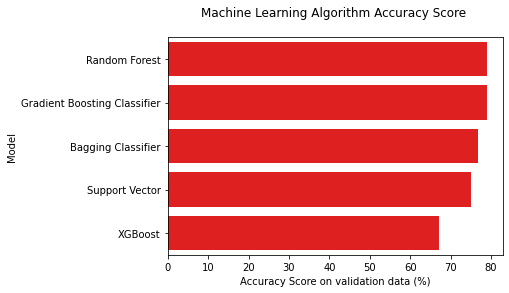

In [ ]:
sns.barplot(x='Score', y = 'Model', data = sorted_by_score, color = 'r')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score on validation data (%)')
plt.ylabel('Model')

#Observations:

##Top 3 models are

*   Random Forest
*   Gradient Boosting classifier
*   Bagging Classifier





#Part 4: Hyperparameter tuning

#using Grid Search method

#1.Tuning for random forest 

In [ ]:
X = scalar.fit_transform(X)

In [ ]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(criterion='entropy', n_estimators = 50,random_state=42)

params = {"min_samples_split" : [4, 6, 8], "n_estimators" : [500, 700, 1000]}

grid_search = GridSearchCV(estimator=rfc, cv=4, param_grid=params, verbose=5) 

grid_search.fit(X, y.values.ravel())



Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV] min_samples_split=4, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=4, n_estimators=500, score=0.788, total=  38.3s
[CV] min_samples_split=4, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.3s remaining:    0.0s


[CV]  min_samples_split=4, n_estimators=500, score=0.774, total=  37.9s
[CV] min_samples_split=4, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s


[CV]  min_samples_split=4, n_estimators=500, score=0.790, total=  36.2s
[CV] min_samples_split=4, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.9min remaining:    0.0s


[CV]  min_samples_split=4, n_estimators=500, score=0.788, total=  35.9s
[CV] min_samples_split=4, n_estimators=700 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.5min remaining:    0.0s


[CV]  min_samples_split=4, n_estimators=700, score=0.787, total=  50.0s
[CV] min_samples_split=4, n_estimators=700 ...........................
[CV]  min_samples_split=4, n_estimators=700, score=0.773, total=  50.1s
[CV] min_samples_split=4, n_estimators=700 ...........................
[CV]  min_samples_split=4, n_estimators=700, score=0.790, total=  49.8s
[CV] min_samples_split=4, n_estimators=700 ...........................
[CV]  min_samples_split=4, n_estimators=700, score=0.788, total=  49.7s
[CV] min_samples_split=4, n_estimators=1000 ..........................
[CV]  min_samples_split=4, n_estimators=1000, score=0.788, total= 1.2min
[CV] min_samples_split=4, n_estimators=1000 ..........................
[CV]  min_samples_split=4, n_estimators=1000, score=0.774, total= 1.2min
[CV] min_samples_split=4, n_estimators=1000 ..........................
[CV]  min_samples_split=4, n_estimators=1000, score=0.789, total= 1.2min
[CV] min_samples_split=4, n_estimators=1000 .......................

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 30.6min finished


AttributeError: ignored

In [ ]:
print(grid_search.best_score_)

0.7885299117394772


In [ ]:
print(grid_search.best_params_)

{'min_samples_split': 8, 'n_estimators': 1000}


#Observations for random Forest:

##Best score: 0.7885299117394772
##Best parameters : {'min_samples_split': 8, 'n_estimators': 1000}

#2.Tuning for gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.075, max_depth=14, max_features=1.0, min_samples_leaf=16)

param_dist = {"n_estimators" : [50,100, 150], "learning_rate":[0.05, 0.025, 0.075, 0.01], "max_depth" : [12,13,14], "min_samples_leaf":[14,15,16,17], "max_features" : [0.5,0.3,0.7,1.0]}

rs = RandomizedSearchCV(estimator=GB, param_distributions=param_dist, scoring='accuracy', cv=10, n_iter=10, n_jobs=-1)

rs.fit(X, y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.075,
                                                        loss='deviance',
                                                        max_depth=14,
                                                        max_features=1.0,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=16,
                                                        min_samples_split=2,
                                                

In [ ]:
print(rs.best_score_)

0.7904377104377105


In [ ]:
print(rs.best_params_)

{'n_estimators': 150, 'min_samples_leaf': 16, 'max_features': 0.5, 'max_depth': 12, 'learning_rate': 0.075}


#Observations for gradient boosting classifier tuning:

#Best Score: 0.7904377104377105

#Best Parameters: {'n_estimators': 150, 'min_samples_leaf': 16, 'max_features': 0.5, 'max_depth': 12, 'learning_rate': 0.075}

#3. Tuning for Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

BC = BaggingClassifier(n_estimators=100,random_state=42)

params_BC = {"n_estimators" : [ 100, 150,200]}
grid_search1 = GridSearchCV(estimator=BC, cv=4, param_grid=params_BC, verbose=5) 

grid_search1.fit(X, y.values.ravel())

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=100, score=0.776, total=  46.3s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   46.3s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.763, total=  46.5s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV] .................... n_estimators=100, score=0.773, total=  45.8s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min remaining:    0.0s


[CV] .................... n_estimators=100, score=0.772, total=  45.5s
[CV] n_estimators=150 ................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.1min remaining:    0.0s


[CV] .................... n_estimators=150, score=0.777, total= 1.1min
[CV] n_estimators=150 ................................................
[CV] .................... n_estimators=150, score=0.765, total= 1.1min
[CV] n_estimators=150 ................................................
[CV] .................... n_estimators=150, score=0.775, total= 1.1min
[CV] n_estimators=150 ................................................
[CV] .................... n_estimators=150, score=0.773, total= 1.1min
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.775, total= 1.5min
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.764, total= 1.6min
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.777, total= 1.6min
[CV] n_estimators=200 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 13.8min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=100, n_jobs=None,
                                         oob_score=False, random_state=42,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [ ]:
print(grid_search1.best_score_)

0.7724579835465678


In [ ]:
print(grid_search1.best_params_)

{'n_estimators': 150}


#Observations for bagging Classifier

#Best Score :0.7724579835465678

#Best parameters: {'n_estimators': 150}

#Continuing this assignment in part3

#Credits:
1. RandomFOrestClassifier : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

2. XG boost : https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/#:~:text=XGBoost%20provides%20a%20wrapper%20class,in%20the%20scikit%2Dlearn%20framework.&text=The%20XGBoost%20model%20for%20classification,learn%20API%20and%20the%20model.

3. Grid Search CV : https://www.mygreatlearning.com/blog/gridsearchcv/